## Import the dependencies

In [2]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Note: Ensure that all required libraries are installed in your environment.

importing the House Price Datase


In [3]:
import pandas as pd

# Define column names based on dataset description using snake case
column_names = [
    "per_capita_crime_rate",             # Per capita crime rate by town
    "prop_residential_zoned_over_25k",   # Proportion of residential land zoned for lots over 25,000 sq. ft.
    "prop_non_retail_business",          # Proportion of non-retail business acres per town
    "charles_river_dummy",               # Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    "nox_concentration",                 # Nitric oxides concentration (parts per 10 million)
    "avg_num_rooms_per_dwelling",        # Average number of rooms per dwelling
    "prop_owner_occupied_pre_1940",      # Proportion of owner-occupied units built prior to 1940
    "dist_to_employment_centers",        # Weighted distances to five Boston employment centers
    "accessibility_to_highways",         # Index of accessibility to radial highways
    "property_tax_rate",              # Full-value property tax rate per $10,000
    "pupil_teacher_ratio",            # Pupil-teacher ratio by town
    "race_factor",                    # 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town
    "pct_lower_status_population",    # Percentage of lower status population
    "median_home_value"               # Median value of owner-occupied homes in $1000s
]

# Load the dataset from the UCI Machine Learning Repository
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
house_price_dataset = pd.read_csv(data_url, delim_whitespace=True, names=column_names)

# Display the first few rows of the dataframe to verify the data has been loaded correctly
print(house_price_dataset.head())


<ipython-input-3-5959770b7dae>:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  house_price_dataset = pd.read_csv(data_url, delim_whitespace=True, names=column_names)


   per_capita_crime_rate  prop_residential_zoned_over_25k  \
0                0.00632                             18.0   
1                0.02731                              0.0   
2                0.02729                              0.0   
3                0.03237                              0.0   
4                0.06905                              0.0   

   prop_non_retail_business  charles_river_dummy  nox_concentration  \
0                      2.31                    0              0.538   
1                      7.07                    0              0.469   
2                      7.07                    0              0.469   
3                      2.18                    0              0.458   
4                      2.18                    0              0.458   

   avg_num_rooms_per_dwelling  prop_owner_occupied_pre_1940  \
0                       6.575                          65.2   
1                       6.421                          78.9   
2                

In [4]:
# Save the DataFrame to a CSV file
# house_price_dataset.to_csv('boston_housing_dataset.csv', index=False) # uncomment to use!

In [5]:
house_price_dataset

,per_capita_crime_rate,prop_residential_zoned_over_25k,prop_non_retail_business,charles_river_dummy,nox_concentration,avg_num_rooms_per_dwelling,prop_owner_occupied_pre_1940,dist_to_employment_centers,accessibility_to_highways,property_tax_rate,pupil_teacher_ratio,race_factor,pct_lower_status_population,median_home_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
# print first 5 rows
house_price_dataset.head()

,per_capita_crime_rate,prop_residential_zoned_over_25k,prop_non_retail_business,charles_river_dummy,nox_concentration,avg_num_rooms_per_dwelling,prop_owner_occupied_pre_1940,dist_to_employment_centers,accessibility_to_highways,property_tax_rate,pupil_teacher_ratio,race_factor,pct_lower_status_population,median_home_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
# Put data in new variable
house_price_df = house_price_dataset


In [8]:
# Checking the number of rows and columns in df
house_price_dataset.shape


(506, 14)

In [9]:
# Check for mising values
house_price_dataset.isnull().sum()

,0
per_capita_crime_rate,0
prop_residential_zoned_over_25k,0
prop_non_retail_business,0
charles_river_dummy,0
nox_concentration,0
avg_num_rooms_per_dwelling,0
prop_owner_occupied_pre_1940,0
dist_to_employment_centers,0
accessibility_to_highways,0
property_tax_rate,0


Cool! no missing values!

In [11]:
# statistical measures of the dataset
# print statistical propertise of data - median_home_value is the target (Price)
house_price_dataset.describe()

,per_capita_crime_rate,prop_residential_zoned_over_25k,prop_non_retail_business,charles_river_dummy,nox_concentration,avg_num_rooms_per_dwelling,prop_owner_occupied_pre_1940,dist_to_employment_centers,accessibility_to_highways,property_tax_rate,pupil_teacher_ratio,race_factor,pct_lower_status_population,median_home_value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various features in the dataset
- Positive correlation
- Negative correlation


In [13]:
# Calculate the correlation matrix for the dataset
# This shows the linear relationship between each pair of numeric variables in the dataset
correlation = house_price_dataset.corr()

# Display the correlation matrix
correlation

,per_capita_crime_rate,prop_residential_zoned_over_25k,prop_non_retail_business,charles_river_dummy,nox_concentration,avg_num_rooms_per_dwelling,prop_owner_occupied_pre_1940,dist_to_employment_centers,accessibility_to_highways,property_tax_rate,pupil_teacher_ratio,race_factor,pct_lower_status_population,median_home_value
per_capita_crime_rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
prop_residential_zoned_over_25k,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
prop_non_retail_business,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
charles_river_dummy,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox_concentration,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
avg_num_rooms_per_dwelling,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
prop_owner_occupied_pre_1940,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dist_to_employment_centers,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
accessibility_to_highways,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
property_tax_rate,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


now let's plot the correlation Matrix

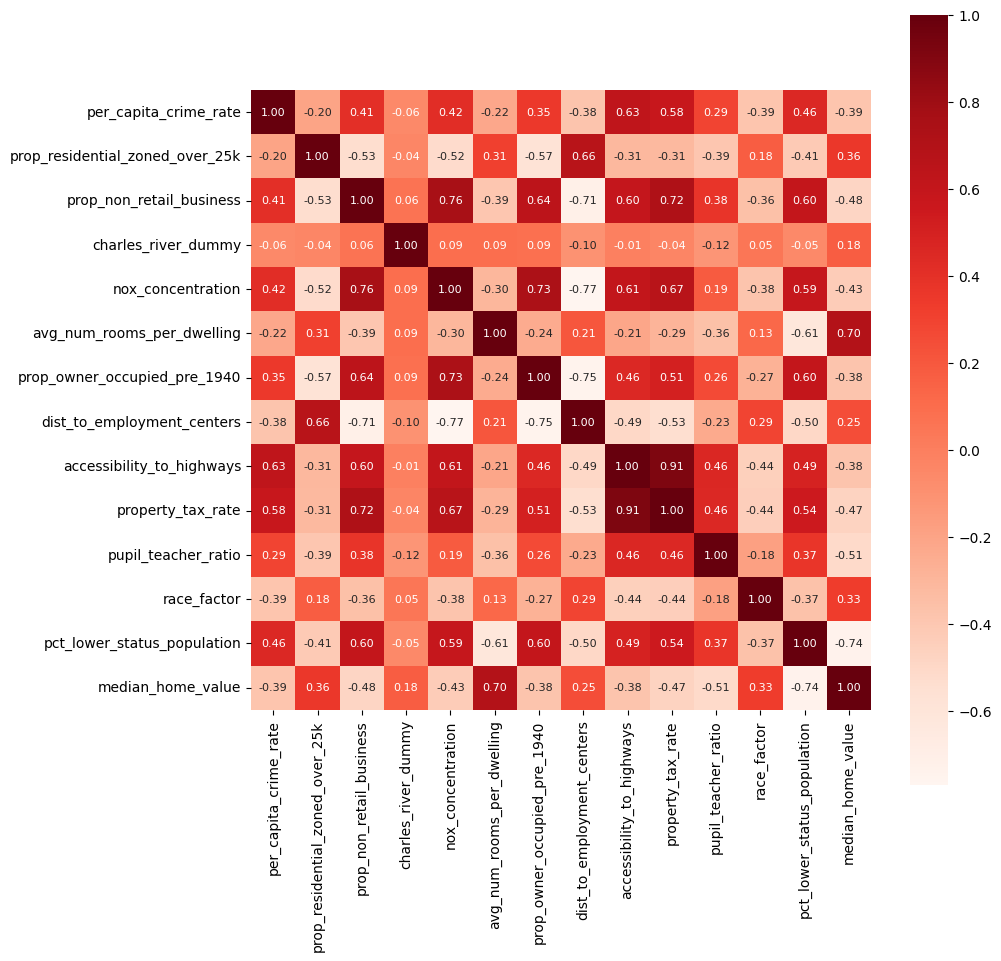

In [16]:
# Set the size of the figure for better readability
plt.figure(figsize=(10, 10))

# Plot the correlation matrix as a heatmap
sns.heatmap(
    correlation,           # The correlation matrix to visualize
    cbar=True,             # Show color bar
    square=True,           # Make each cell square-shaped
    fmt='.2f',             # Format annotation text to 2 decimal places
    annot=True,            # Display correlation values in each cell
    annot_kws={'size': 8}, # Font size for annotations
    cmap='Reds'            # Color map: from white (low) to red (high)
)

# Display the heatmap
plt.show()

make the correlation martix fancy!

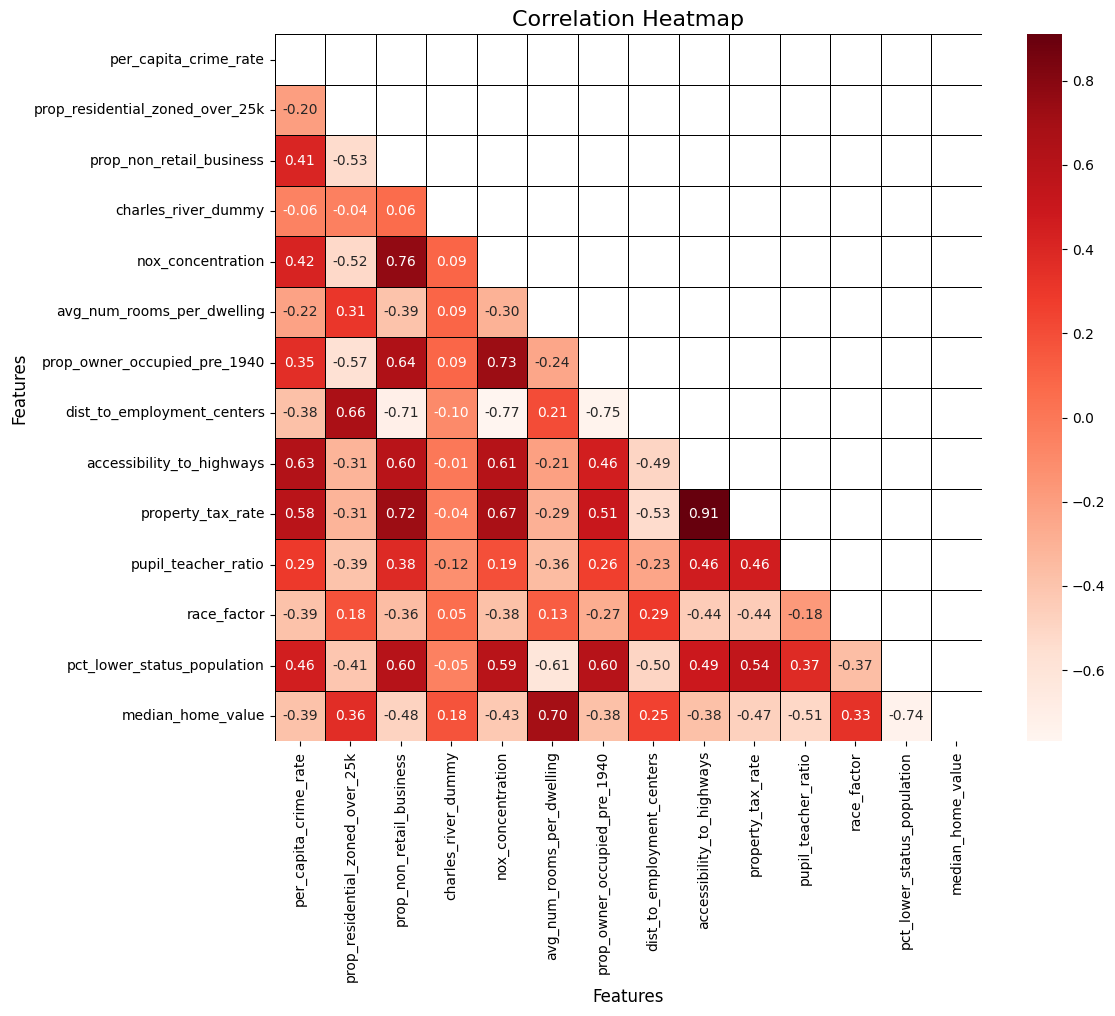

In [18]:
# Assuming 'correlation' is your correlation matrix
plt.figure(figsize=(12, 10))

# Optional: Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Create the heatmap
sns.heatmap(correlation,
            mask=mask,  # Uncomment if you want to mask the upper triangle
            cbar=True,
            square=True,
            fmt='.2f',
            annot=True,
            annot_kws={'size': 10},
            cmap='Reds',
            linewidths=0.5,  # Add lines between cells
            linecolor='black')  # Color of the lines

# Add title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


and here is all things we need!

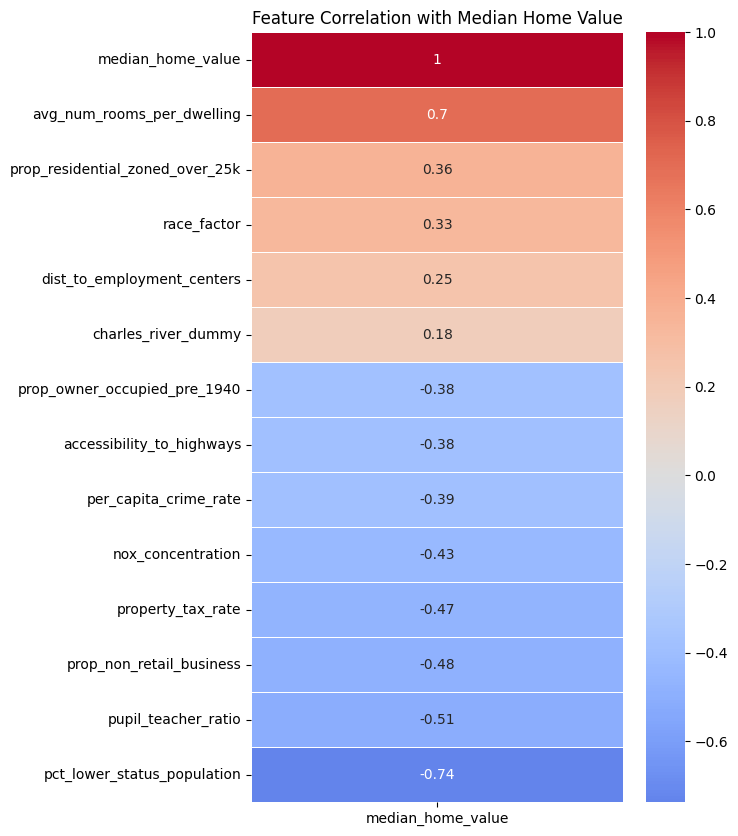

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation = house_price_dataset.corr()

# Extract correlations with target
target_corr = correlation['median_home_value'].sort_values(ascending=False)

# Plot heatmap of feature correlations with target
plt.figure(figsize=(6, 10))
sns.heatmap(
    target_corr.to_frame(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    center=0
)
plt.title("Feature Correlation with Median Home Value")
plt.show()

## Spliting the data and target

In [20]:
# Drop the 'median_home_value' column from the dataset to create the feature set (X)
# This is done because 'median_home_value' is the target variable we want to predict
X = house_price_dataset.drop(['median_home_value'], axis=1)

# Select the 'median_home_value' column from the dataset as the target variable (Y)
# This variable represents the house prices we want to predict based on the features in X
Y = house_price_dataset['median_home_value']


see what is inside the X:

In [22]:
X

,per_capita_crime_rate,prop_residential_zoned_over_25k,prop_non_retail_business,charles_river_dummy,nox_concentration,avg_num_rooms_per_dwelling,prop_owner_occupied_pre_1940,dist_to_employment_centers,accessibility_to_highways,property_tax_rate,pupil_teacher_ratio,race_factor,pct_lower_status_population
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


see what is inside the Y:

In [23]:
Y

,median_home_value
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


Spliting the data into train and test data

In [26]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X contains the features, and Y contains the target variable (median house prices)
# test_size=0.2 indicates that 20% of the data will be used for testing, while 80% will be used for training
# random_state=2 ensures reproducibility of the split by setting a seed for the random number generator
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [61]:
# print(f"\nX_train:\n{X_train}\n")
# print(f"X_test:\n{X_test}\n")
# print(f"Y_train:\n{Y_train}\n")
# print(f"Y_test:\n{Y_test}\n")


### Model Training:

XGBoost Regressor

In [64]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import numpy as np

# -------------------------------
# Step 1: Cross-Validation (to estimate performance)
# -------------------------------
# Initialize the model
model = XGBRegressor(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(
    model,
    X_train,
    Y_train,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Convert negative MSE scores to positive and compute average
mean_cv_mse = -cv_scores.mean()

# Print cross-validated MSE
print(f"Mean Cross-Validated MSE: {mean_cv_mse:.2f}")

# -------------------------------
# Step 2: Train Final Model on Full Training Data
# -------------------------------
model.fit(X_train, Y_train)

# -------------------------------
# Step 3: Make Predictions on Test Set
# -------------------------------
Y_pred = model.predict(X_test)


Mean Cross-Validated MSE: 10.02


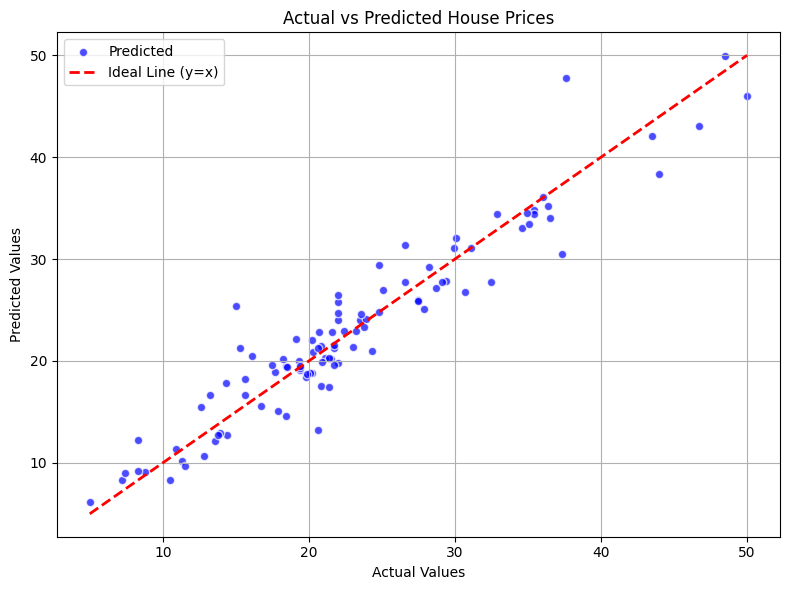

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7, color='blue', edgecolor='w', label='Predicted')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label='Ideal Line (y=x)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

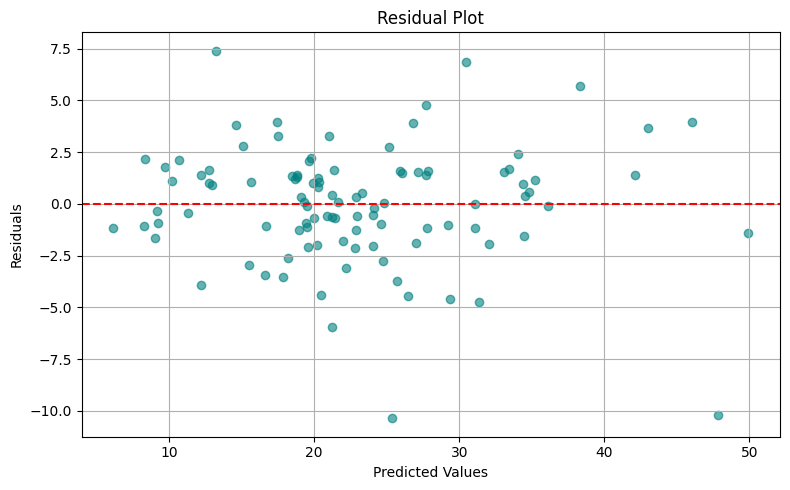

In [67]:
residuals = Y_test - Y_pred

plt.figure(figsize=(8, 5))
plt.scatter(Y_pred, residuals, alpha=0.6, color='teal')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

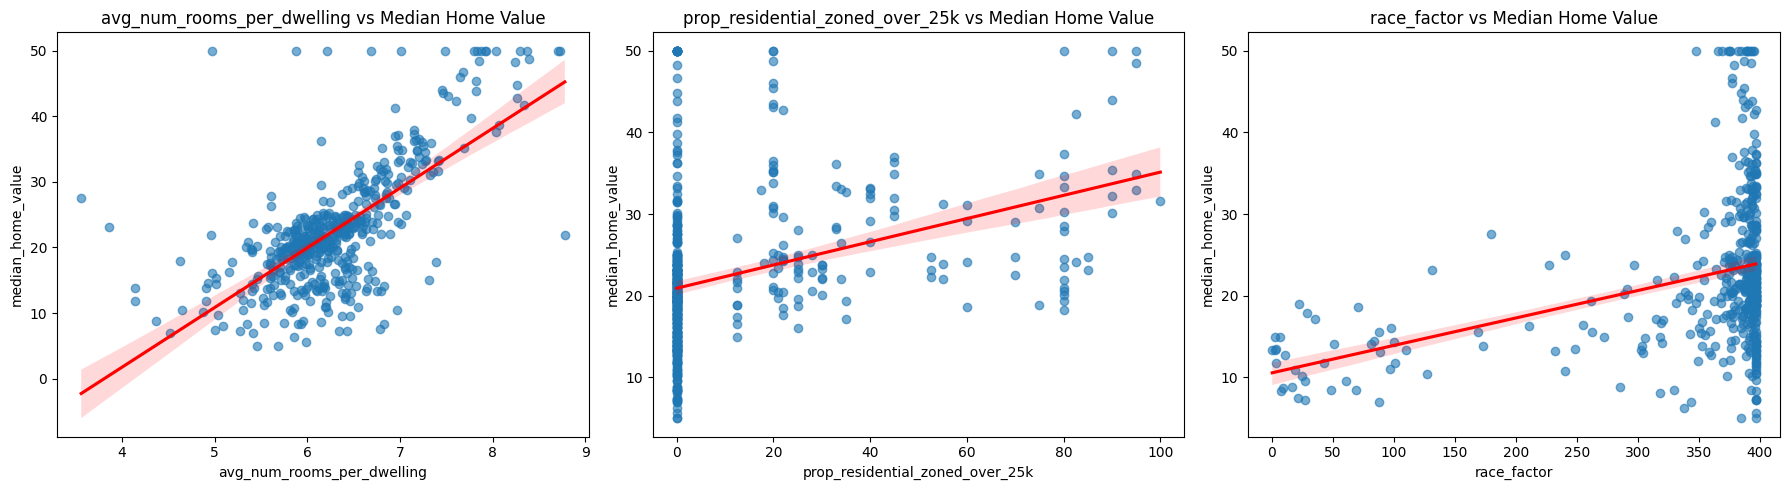

In [76]:
top_features = target_corr.index[1:4]  # Top 3 most correlated features

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(top_features):
    sns.regplot(
        ax=axes[i],
        x=house_price_dataset[feature],
        y=house_price_dataset['median_home_value'],
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    axes[i].set_title(f'{feature} vs Median Home Value')

plt.tight_layout()
plt.show()

# Evaluation

Prediction on Training data


In [83]:
from sklearn import metrics
import numpy as np

# Compute evaluation metrics
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)  # Square root of MSE gives RMSE
r2 = metrics.r2_score(Y_test, Y_pred)

# Print the results with clear formatting
print("✅ Evaluation Metrics:")
print("----------------------")
print(f"Mean Absolute Error (MAE):     {mae:.2f}")
print(f"Mean Squared Error (MSE):      {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score:                      {r2:.4f}")

✅ Evaluation Metrics:
----------------------
Mean Absolute Error (MAE):     2.07
Mean Squared Error (MSE):      7.93
Root Mean Squared Error (RMSE): 2.82
R² Score:                      0.9052
